# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
train = pd.read_csv('titanic_train.csv')

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

<AxesSubplot:>

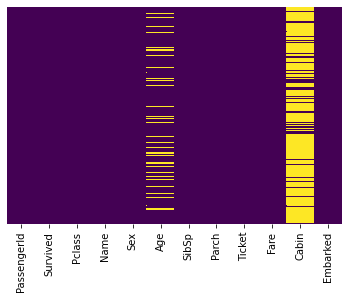

In [5]:
# Use seaborn to create a simple heatmap to see where we are missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Missing too much of cabin column to use it, but age can still be used with some imputation.

<AxesSubplot:xlabel='Survived', ylabel='count'>

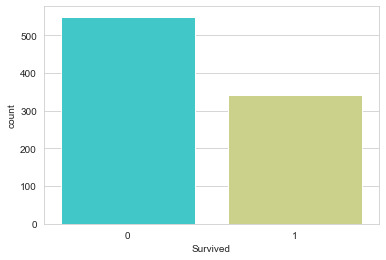

In [7]:
# Always a good idea to visualize the distribution of the target
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

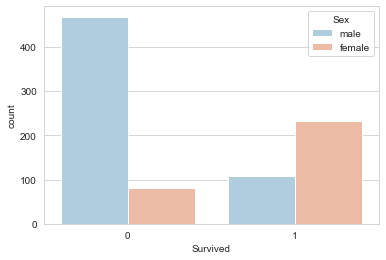

In [8]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

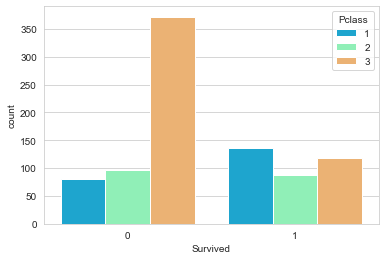

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

<AxesSubplot:xlabel='Age', ylabel='Count'>

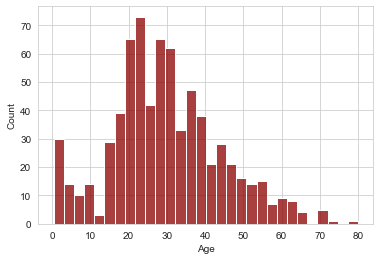

In [11]:
sns.histplot(train['Age'].dropna(),kde=False,color='darkred', bins=30)

<AxesSubplot:>

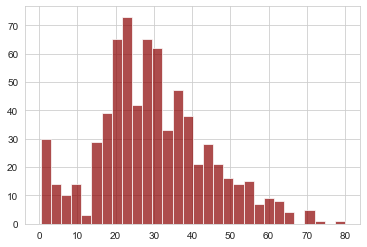

In [12]:
train['Age'].hist(bins=30, color='darkred', alpha=.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

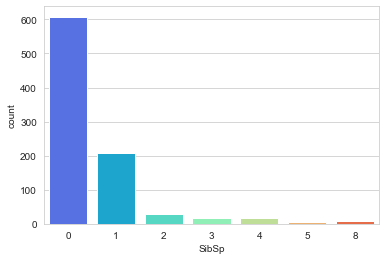

In [14]:
sns.countplot(x='SibSp', data=train, palette='rainbow')

<AxesSubplot:>

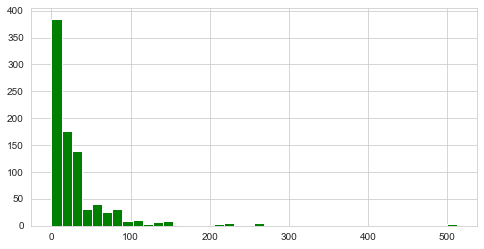

In [15]:
train['Fare'].hist(color='green', bins=40, figsize=(8,4))

### Cufflinks visualizations

In [16]:
import cufflinks as cf
cf.go_offline()

In [17]:
train['Fare'].iplot(kind='hist', bins=30, color='green')

### Data Cleaning
Fill in the missing age data by filling in the mean age of all passengers by class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

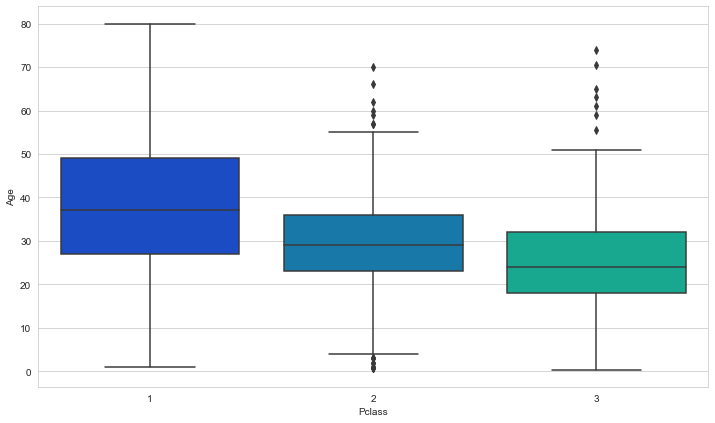

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [29]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return int(train.groupby('Pclass').mean().loc[1]['Age'])
    
        elif Pclass == 2:
            return int(train.groupby('Pclass').mean().loc[2]['Age'])
        
        else:
            return int(train.groupby('Pclass').mean().loc[3]['Age'])
        
    else:
        return Age

In [75]:
train['Age'].head()
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

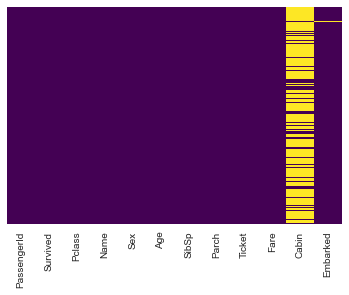

In [76]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [77]:
train.drop('Cabin', axis=1, inplace=True)

In [78]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [79]:
train.dropna(inplace=True)

## Converting Categorical Features

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [81]:
# Convert categorical features to dummy variables

In [82]:
# drop s and female columns
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [83]:
# Drop columns that we don't need anymore
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [84]:
train = pd.concat([train, sex, embark], axis=1)

In [85]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [86]:
# train with p class divided as a dummy column
cl = pd.get_dummies(train['Pclass'], drop_first=True)
train2 = pd.concat([train.drop(['Pclass'],axis=1),cl], axis=1)
train2.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


## Building Logistic Regression Model

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=.3, random_state=101)

In [89]:
from sklearn.linear_model import LogisticRegression

In [91]:
logmodel = LogisticRegression(max_iter=5000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [92]:
predictions = logmodel.predict(X_test)

### Evaluation

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 33,  71]])

### Using the train2 set:

In [98]:
X_train, X_test, y_train, y_test = train_test_split(train2.drop('Survived', axis=1), train2['Survived'], test_size=.3, random_state=101)

In [101]:
logmodel2 = LogisticRegression(max_iter=5000)
logmodel2.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [102]:
predictions = logmodel2.predict(X_test)